In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("C:\\Users\\ACER\\Downloads\\15_Assembly_Segment_Wise_Information_Electors.csv")
data.head()

In [ ]:
print(data.dtypes)

State Name                                     object
Ac Name                                        object
Pc Name                                        object
Electors - General - Other Than NRI - M         int64
Electors - General - Other Than NRI - F         int64
Electors - General - Other Than NRI - TG        int64
Electors - General - Other Than NRI - Total     int64
Electors - General - NRI - M                    int64
Electors - General - NRI - F                    int64
Electors - General - NRI - TG                   int64
Electors - General - NRI - Total                int64
Electors - Service - M                          int64
Electors - Service - F                          int64
Electors - Service - Total                      int64
Electors - Total Electors                       int64
Votes Polled On Evm (Valid Votes + NOTA)        int64
dtype: object


In [ ]:
data.info()

State Name                                     0
Ac Name                                        0
Pc Name                                        0
Electors - General - Other Than NRI - M        0
Electors - General - Other Than NRI - F        0
Electors - General - Other Than NRI - TG       0
Electors - General - Other Than NRI - Total    0
Electors - General - NRI - M                   0
Electors - General - NRI - F                   0
Electors - General - NRI - TG                  0
Electors - General - NRI - Total               0
Electors - Service - M                         0
Electors - Service - F                         0
Electors - Service - Total                     0
Electors - Total Electors                      0
Votes Polled On Evm (Valid Votes + NOTA)       0
dtype: int64

In [ ]:
print("Number of missing values in each column:\n",data.isnull().sum())

,Electors - Total Electors,Votes Polled On Evm (Valid Votes + NOTA)
Electors - Total Electors,1.000000,0.999996
Votes Polled On Evm (Valid Votes + NOTA),0.999996,1.000000


Text(0.5, 1.0, 'Correlation between Total Electors and Votes Polled On EVM')

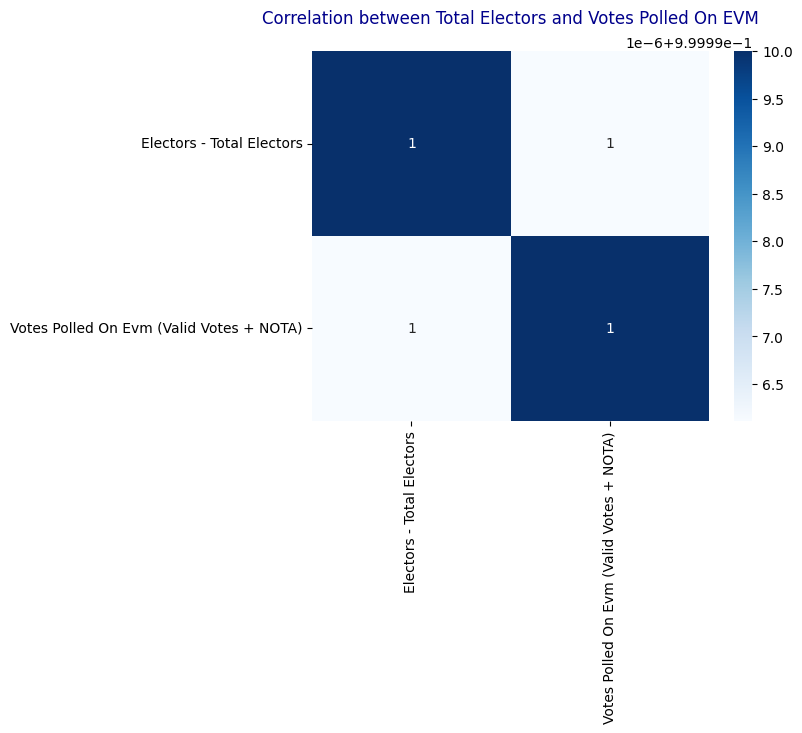

In [ ]:
print("Number of duplicated rows:\n",data.duplicated().sum())

<Axes: xlabel='Votes Polled On Evm (Valid Votes + NOTA)'>

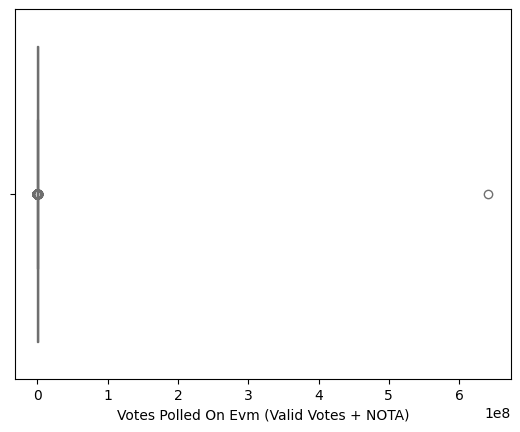

In [ ]:
correlation=data[['Electors - Total Electors','Votes Polled On Evm (Valid Votes + NOTA)']].corr()
correlation

In [ ]:

sns.heatmap(correlation,annot=True,cmap='Blues')
plt.title("Correlation between Total Electors and Votes Polled On EVM",pad=20,color='darkblue')

In [ ]:
sump = data['Votes Polled On Evm (Valid Votes + NOTA)'].sum()
sumt = data['Electors - Total Electors'].sum()
d = [sump, sumt]
labels = ["POLLED", "TOTAL"]
plt.pie(d, labels=labels, autopct='%1.1f%%', startangle=90)

In [ ]:
#Use summary statistics (mean, median, standard deviation, etc.) to analyze gender-wise distribution of electors and detect any significant imbalances.
'''------------------------------------------------objective 2-----------------------------------------------------'''
gender = data[['Electors - General - Other Than NRI - M','Electors - General - Other Than NRI - F','Electors - General - Other Than NRI - TG']]
mmean = gender['Electors - General - Other Than NRI - M'].mean()
mmed = gender['Electors - General - Other Than NRI - M'].median()
mstd = gender['Electors - General - Other Than NRI - M'].std()
fmean = gender['Electors - General - Other Than NRI - F'].mean()
fmed = gender['Electors - General - Other Than NRI - F'].median()
fstd = gender['Electors - General - Other Than NRI - F'].std()
tmean = gender['Electors - General - Other Than NRI - TG'].mean()
tmed = gender['Electors - General - Other Than NRI - TG'].median()
tstd = gender['Electors - General - Other Than NRI - TG'].std()
# Print results
print("Male Electors Other Than NRI:")
print("Mean:", mmean)
print("Median:", mmed)
print("Standard Deviation:", mstd)

print("\nFemale Electors Other than NRI:")
print("Mean:", fmean)
print("Median:", fmed)
print("Standard Deviation:", fstd)
print("\nTG Electors:")
print("Mean:", tmean)
print("Median:", tmed)
print("Standard Deviation:", tstd)

In [ ]:
gendern = data[['Electors - General - NRI - M','Electors - General - NRI - F','Electors - General - NRI - TG']]
mnrimean = gendern['Electors - General - NRI - M'].mean()
mnrimed = gendern['Electors - General - NRI - M'].median()
mnristd = gendern['Electors - General - NRI - M'].std()
fnrimean = gendern['Electors - General - NRI - F'].mean()
fnrimed = gendern['Electors - General - NRI - F'].median()
fnristd = gendern['Electors - General - NRI - F'].std()
tnrimean = gendern['Electors - General - NRI - TG'].mean()
tnrimed = gendern['Electors - General - NRI - TG'].median()
tnristd = gendern['Electors - General - NRI - TG'].std()
# Print results
print("Male NRI Electors:")
print("Mean:", mnrimean)
print("Median:", mnrimed)
print("Standard Deviation:", mnristd)

print("\nFemale NRI Electors:")
print("Mean:", fnrimean)
print("Median:", fnrimed)
print("Standard Deviation:", fnristd)
print("\nTG Electors:")
print("Mean:", tnrimean)
print("Median:", tnrimed)
print("Standard Deviation:", tnristd)

In [ ]:
'''---Identify and visualize outliers in the 'Votes Polled On EVM' column using statistical methods and boxplots.---'''
votes = data['Votes Polled On Evm (Valid Votes + NOTA)'].dropna()
# Calculate IQR (Interquartile Range)
Q1 = votes.quantile(0.25)
Q3 = votes.quantile(0.75)
IQR = Q3 - Q1
# Find outliers
lower_limit = Q1 - 1.2 * IQR
upper_limit = Q3 + 1.2 * IQR
outliers = votes[(votes < lower_limit) | (votes > upper_limit)]
# Print number of outliers
print("Number of outliers:", len(outliers))
# Visualize with boxplot
plt.boxplot(votes)
plt.title("Boxplot: Votes Polled on EVM")
plt.ylabel("Votes")
plt.show()


In [ ]:
#Filter out the outliers
data_no_outliers = data[(votes >= lower_limit) & (votes <= upper_limit)]
print("Original dataset size:", len(data))
print("After removing outliers:", len(data_no_outliers))
plt.boxplot(data_no_outliers['Votes Polled On Evm (Valid Votes + NOTA)'])
plt.title("Boxplot (Without Outliers): Votes Polled on EVM")
plt.ylabel("Votes")
plt.grid(True)
plt.show()

In [ ]:
'''--Visualize the distribution of electors across different categories: General, NRI, and Service.---'''
general_total = data['Electors - General - Other Than NRI - Total'].sum()
nri_total = data['Electors - General - NRI - Total'].sum()
service_total = data['Electors - Service - Total'].sum()
categories = ['General', 'NRI', 'Service']
values = [general_total, nri_total, service_total]
# Bar plot
plt.bar(categories, values)
plt.title('Elector Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Electors')
plt.yscale('log')
plt.show()

In [ ]:
'''--Create comparative visualizations of gender-wise elector distribution across all categories (General, NRI, and Service).--'''
# Total electors by gender and category

categories = ['General', 'NRI', 'Service']
male = [
    data['Electors - General - Other Than NRI - M'].sum(),
    data['Electors - General - NRI - M'].sum(),
    data['Electors - Service - M'].sum()
]
female = [
    data['Electors - General - Other Than NRI - F'].sum(),
    data['Electors - General - NRI - F'].sum(),
    data['Electors - Service - F'].sum()
]
# TG only available for General and NRI
tg = [
    data['Electors - General - Other Than NRI - TG'].sum(),
    data['Electors - General - NRI - TG'].sum(),
    0  # No TG in Service category
]
# Plotting
x = np.arange(len(categories))  # the label locations
width = 0.25  # the width of the bars
plt.figure(figsize=(10, 6))
plt.bar(x - width, male, width, label='Male', color='skyblue')
plt.bar(x, female, width, label='Female', color='lightcoral')
plt.bar(x + width, tg, width, label='Third Gender', color='lightgreen')
plt.xlabel('Category')
plt.ylabel('Number of Electors')
plt.title('Gender-wise Elector Comparison by Category')
plt.xticks(x, categories)
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()